The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


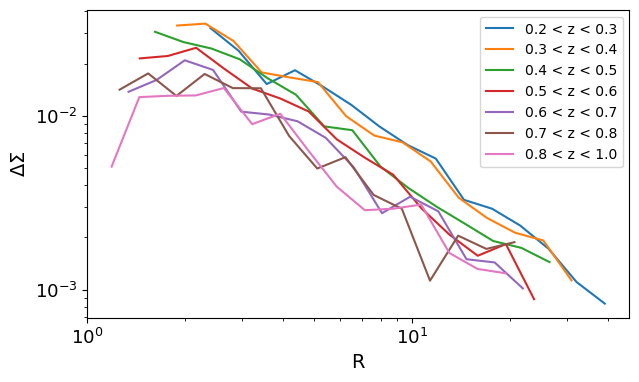

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '../../CLCosmo_Sim_database/data_vary_fiducial_cosmology/'
data_true = np.load(path_to_data + f'stacked_gammat_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles_true = data_true['stacked_profile']
z = data_true['stacked_profile']['z_mean']
for z_bin in analysis.Z_bin:
    mask = (z > z_bin[0])*(z < z_bin[1])
    r = np.mean(profiles_true['radius'][mask], axis=0)
    ds = np.mean(profiles_true['DSt'][mask], axis=0)
    plt.loglog(r, ds, label=f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}')
plt.xscale('log')
plt.ylabel(r'$\Delta\Sigma$', fontsize=14)
plt.xlabel('R', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which="both", labelsize= 13)
#plt.savefig('../fig/stacked_redmapper_profiles_attenuation.png', bbox_inches='tight', dpi=100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


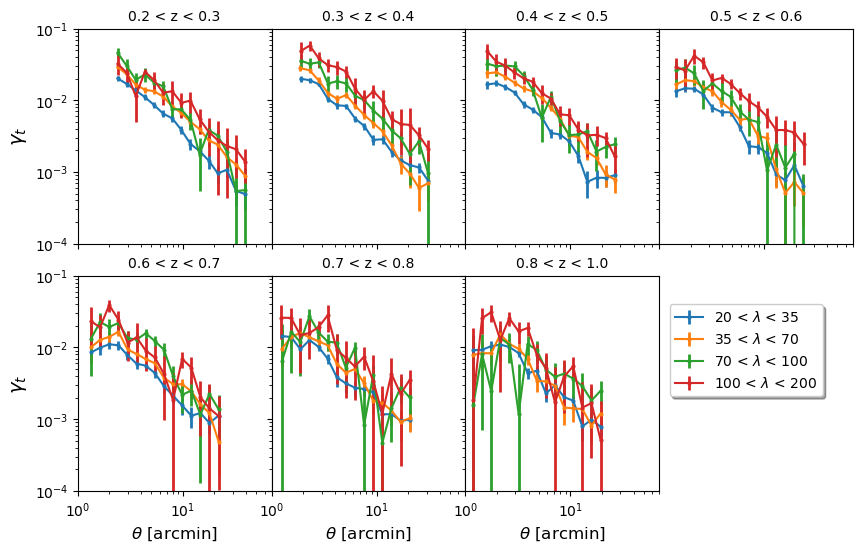

In [5]:
path_to_data = '../../CLCosmo_Sim_database/data_vary_fiducial_cosmology/'
data = np.load(path_to_data + f'stacked_gammat_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked_profile']
covariances = data['stacked_covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(2,4, figsize = (10,6))
fig.subplots_adjust(wspace=0, hspace=0.15)
index_z = [0,1,2,3,0,1,2]
for iz, z_bin in enumerate(Z_bin):
    i = index_z[iz]
    if iz <= 3:
        n = 0
    else: n=1
    for j, m_bin in enumerate(Obs_bin):

            label_z = f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[n,i].errorbar(f_cut['radius'][0], f_cut['DSt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[n,i].set_ylim(0.0001, 0.1)
            axs[n,i].set_xlim(1, 70)
            axs[n,i].set_xscale('log')
            axs[n,i].set_yscale('log')
            #axs[n,i].vlines(1, 0, 1e19, ls='--', color='k', lw=.7, zorder=0)
            #axs[n,i].vlines(3.5, 0, 1e19, ls='-', color='k',lw=.7,zorder=0)
            axs[n,i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[n,i].set_xlabel(r'$\theta$ [arcmin]', fontsize = 12)
            axs[n,i].set_title(label_z, fontsize = 10)
            axs[n,i].set_ylabel(r'$\gamma_t$', fontsize=14)
        #except: a=1
        

        
    axs[1,2].legend(loc='upper center', bbox_to_anchor=(1.45, .9),
          ncol=1, fancybox=True, shadow=True)
fig.delaxes(axs[1,3])
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('../fig/stacked_redmapper_gammat_profiles.png', bbox_inches='tight', dpi=300)

142
73
14
6
312
139
21
7


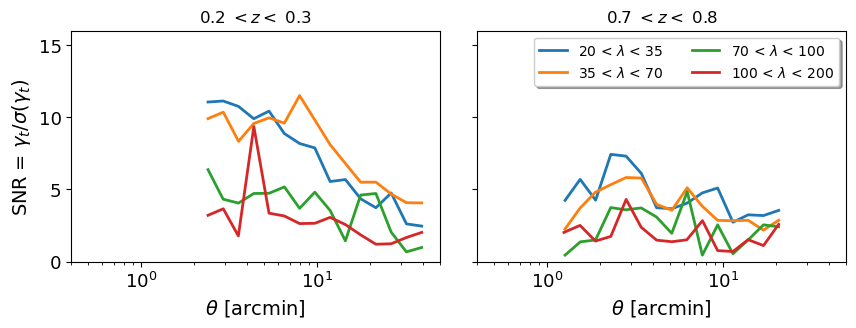

In [6]:
path_to_data = '../../CLCosmo_Sim_database/data_vary_fiducial_cosmology/'
data = np.load(path_to_data + f'stacked_gammat_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked_profile']
covariances = data['stacked_covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,2, figsize = (10, 3))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, z_bin in enumerate([Z_bin[0], Z_bin[5]]):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} $< z <$ {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            N = len(f_cut['z_individual'][0])
            print(N)
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['DSt'][0]/err[0] ,lw=2,
                            marker = ' ',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(0, 16)
            axs[i].set_xlim(0.4, 50)
            axs[i].set_xscale('log')
            #axs[i].set_yscale('log')
            #axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 13)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel(r'$\theta$ [arcmin]', fontsize = 14)
            axs[i].set_title(label_z, fontsize = 12)
            axs[0].set_ylabel(r'SNR = $\gamma_t/\sigma(\gamma_t)$', fontsize=14)
            #axs[i].grid('True', which='both')
        #except: a=1
        
axs[1].legend(loc='upper right',# bbox_to_anchor=(-2.5, 1.4),
      #fancybox=True,
           ncol=2,
           shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('../fig/snr_gammat_profiles.png', bbox_inches='tight', dpi=300)